<a href="https://colab.research.google.com/github/huamanchristian44/Lab02-HE/blob/main/Mineria_de_datos_Laboratorio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 59.1 MB/s eta 0:00:00
   ━━

### 2. Entendimiento de los datos

In [ ]:
import pandas as pd
from pycaret.classification import *
from pycaret.datasets import get_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Ver primeras filas
print(df.head())

# Información general
print(df.info())

# Estadísticas básicas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

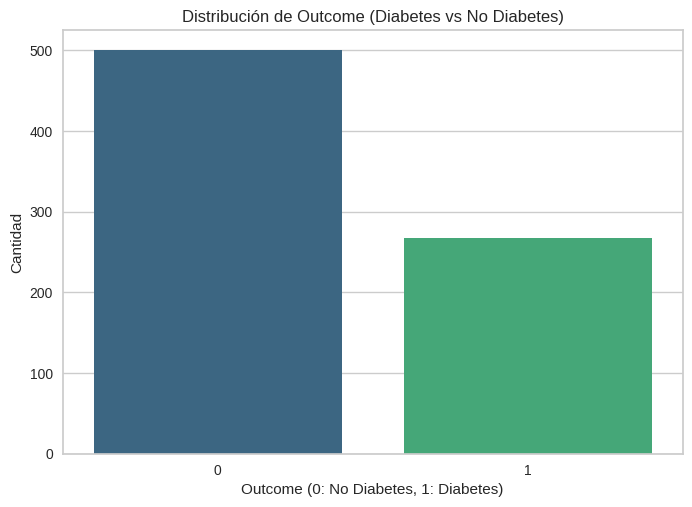

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de la variable objetivo
sns.countplot(x=df['Outcome'], palette='viridis')
plt.title("Distribución de Outcome (Diabetes vs No Diabetes)")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Cantidad")
plt.show()

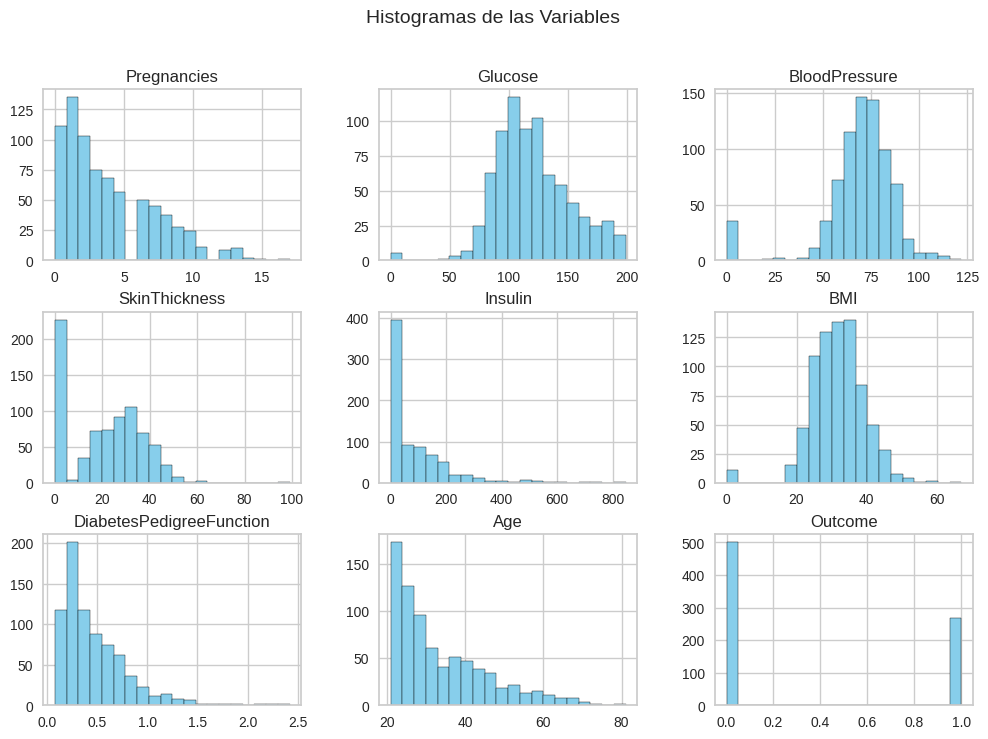

In [ ]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black', color='skyblue')
plt.suptitle("Histogramas de las Variables", fontsize=14)
plt.show()

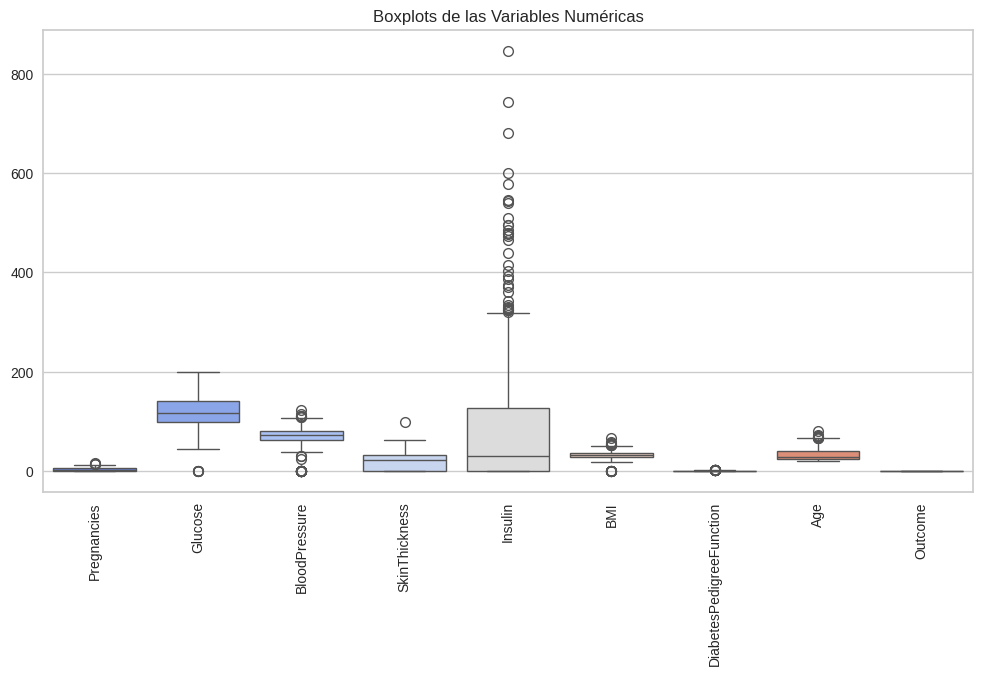

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Boxplots de las Variables Numéricas")
plt.show()

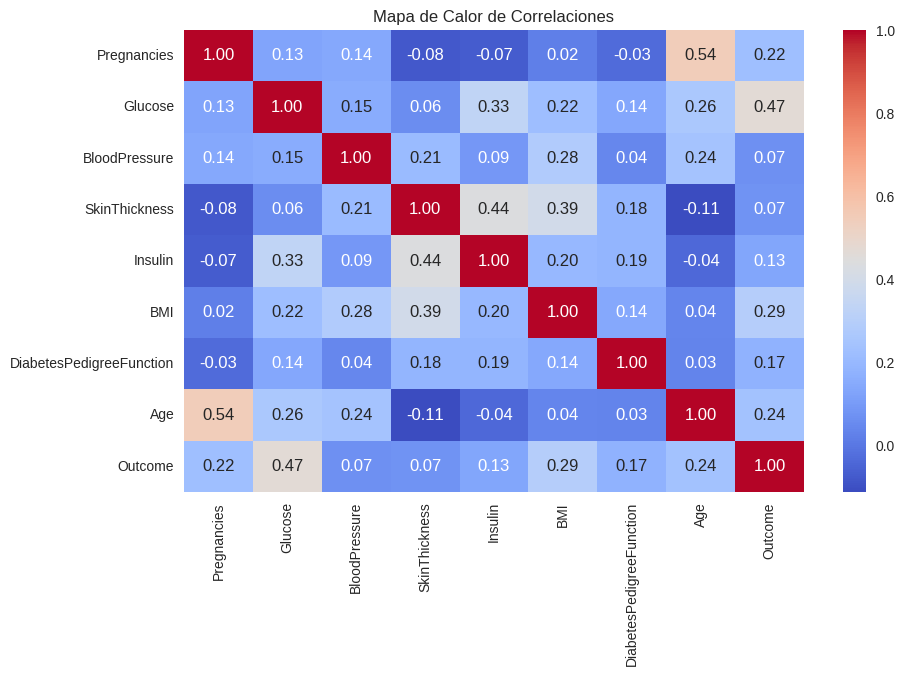

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### 3. Preparación de los datos



In [ ]:
import numpy as np

# Reemplazar valores cero en variables clínicas (ejemplo: presión, glucosa) con la mediana
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

# Codificar variables categóricas si es necesario (suponiendo que existen)
# df = pd.get_dummies(df, drop_first=True)

# Normalización de variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']

print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


### 4. Modelado de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar variables predictoras y target
X = df_scaled.drop(columns=['Outcome'])
y = df_scaled['Outcome']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [ ]:
clf = setup(df, target='Outcome', session_id=42)

# Comparar modelos
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7820,0.8395,0.5708,0.7463,0.6382,0.4885,0.5027,0.0540
lda,Linear Discriminant Analysis,0.7745,0.8395,0.5708,0.7244,0.6313,0.4742,0.4857,0.0250
lr,Logistic Regression,0.7726,0.8389,0.5760,0.7223,0.6312,0.4722,0.4849,1.8340
rf,Random Forest Classifier,0.7636,0.8240,0.5775,0.7036,0.6236,0.4563,0.4686,0.4260
gbc,Gradient Boosting Classifier,0.7635,0.8198,0.6035,0.6930,0.6327,0.4623,0.4737,0.1620
qda,Quadratic Discriminant Analysis,0.7543,0.8188,0.5453,0.6867,0.5986,0.4281,0.4392,0.0440
lightgbm,Light Gradient Boosting Machine,0.7524,0.8000,0.5930,0.6699,0.6212,0.4400,0.4475,0.3590
et,Extra Trees Classifier,0.7523,0.8146,0.5602,0.6771,0.6020,0.4276,0.4396,0.1720
nb,Naive Bayes,0.7506,0.8133,0.5822,0.6672,0.6127,0.4322,0.4406,0.0620
ada,Ada Boost Classifier,0.7410,0.7829,0.5763,0.6392,0.5983,0.4106,0.4176,0.1930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Crear el mejor modelo
best_tuned = tune_model(best_model)

# Predicciones en test set
predictions = predict_model(best_tuned)
print(predictions.head())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8887,0.7895,0.6818,0.7317,0.5689,0.5729
1,0.8148,0.8541,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.8333,0.9083,0.6842,0.8125,0.7429,0.6209,0.6259
3,0.7593,0.8105,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.8148,0.8000,0.6316,0.8000,0.7059,0.5735,0.5820
5,0.7778,0.8647,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7593,0.8090,0.4211,0.8000,0.5517,0.4081,0.4474
7,0.8113,0.8714,0.6667,0.7500,0.7059,0.5677,0.5698
8,0.7170,0.7476,0.3889,0.6364,0.4828,0.3032,0.3207


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7359,0.6831,0.5062,0.6613,0.5734,0.3871,0.3943


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
730            3    130.0           78.0           23.0     79.0  28.400000   
198            4    109.0           64.0           44.0     99.0  34.799999   
24            11    143.0           94.0           33.0    146.0  36.599998   
417            4    144.0           82.0           32.0    125.0  38.500000   
387            8    105.0          100.0           36.0    125.0  43.299999   

     DiabetesPedigreeFunction  Age  Outcome  prediction_label  
730                     0.323   34        1                 0  
198                     0.905   26        1                 0  
24                      0.254   51        1                 1  
417                     0.554   37        1                 1  
387                     0.239   45        1                 0  


### 5. Evaluación

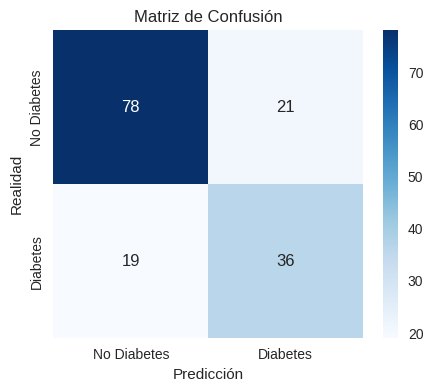

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

### 6. Despliegue

In [ ]:
import joblib

# Guardar modelo
joblib.dump(model, 'modelo_diabetes.pkl')

['modelo_diabetes.pkl']